In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [81]:
df = pd.read_csv('2013_movies.csv')

In [82]:
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'], format='%Y-%m-%d %H:%M:%S')
df['DomesticTotalGross'] = df.DomesticTotalGross.apply(int)
df.sort_values('ReleaseDate', ascending =True, inplace =True)

## Challenge 1

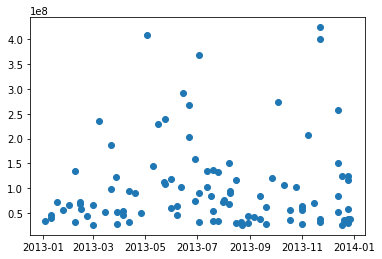

In [30]:
plt.plot(df.ReleaseDate,df.DomesticTotalGross, 'o')

## Challenge 2

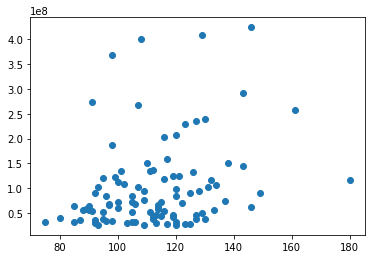

In [31]:

plt.plot(df.Runtime,df.DomesticTotalGross, 'o')

## Challenge 3

In [32]:
df.groupby('Rating')[['Runtime', 'DomesticTotalGross']].mean()

,Runtime,DomesticTotalGross
Rating,,
G,107.000000,2.684928e+08
PG,99.933333,1.311357e+08
PG-13,117.510638,1.114498e+08
R,110.729730,6.989243e+07


## Challenge 4

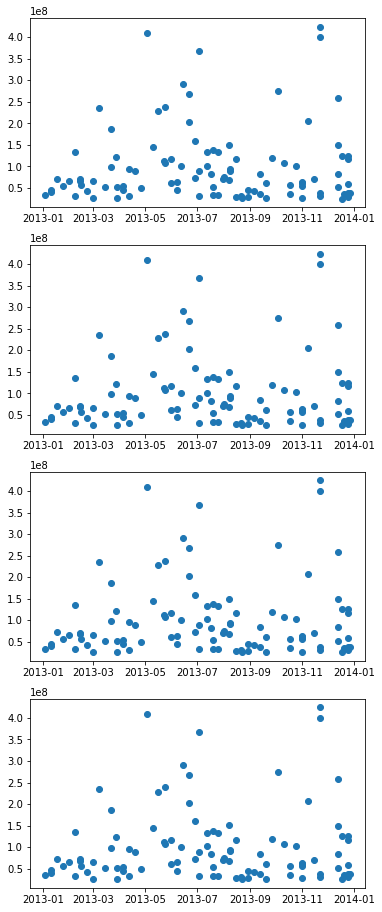

In [40]:
fig, ax = plt.subplots(4, 1, figsize=(6, 16))

grps = df.groupby('Rating')
for i, grp in enumerate(grps):
    ax[i].plot(df.ReleaseDate,df.DomesticTotalGross, 'o')
    

## Challenge 5

In [59]:
df2 = df.groupby('Director')[['Director']].count()
df2.columns = ['FilmCount']
df2['TotalGross'] = df.groupby('Director')['DomesticTotalGross'].sum()
df2['AverageGross'] = df2.TotalGross / df2.FilmCount
df2.sort_values('AverageGross', ascending = False).head(1)

,FilmCount,TotalGross,AverageGross
Director,,,
Francis Lawrence,1,424668047,424668047.0


In [70]:
df['Month'] = df.ReleaseDate.dt.month
df3 = pd.DataFrame()
df3['Count'] = df.groupby('Month')['Month'].count()
df3['Mean'] = df.groupby('Month')['DomesticTotalGross'].mean()
df3['StdDev'] = df.groupby('Month')['DomesticTotalGross'].std()
df3['StdErr'] = df3.StdDev / df3.Count.apply(np.sqrt)

df3

,Count,Mean,StdDev,StdErr
Month,,,,
1,5,4.954324e+07,1.465947e+07,6.555914e+06
2,7,6.738601e+07,3.283185e+07,1.240927e+07
3,9,9.609710e+07,7.323942e+07,2.441314e+07
4,6,6.094072e+07,2.530104e+07,1.032911e+07
5,8,1.774097e+08,1.117754e+08,3.951859e+07
6,8,1.506500e+08,9.519994e+07,3.365826e+07
7,12,1.057807e+08,9.140837e+07,2.638732e+07
8,11,6.853126e+07,4.132232e+07,1.245915e+07
9,6,6.171231e+07,3.482327e+07,1.421654e+07


## Challenge 6

<Container object of 12 artists>

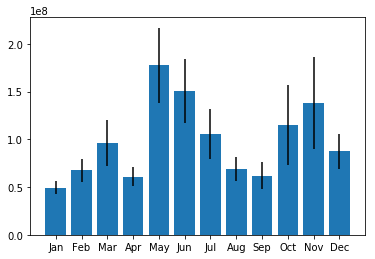

In [80]:
import calendar

labels = df3.reset_index().Month.apply(lambda x: calendar.month_abbr[x])

plt.bar(df3.index, df3.Mean, yerr = df3.StdErr, tick_label= labels)